# Analyzing WeRateDogs Tweets Data

In this notebook we use the data we have from WeRateDogs twitter account to answer some questions and extract some insights from our data.

## We start with loading the data and importing required libraries


In [13]:
#load clean data
import matplotlib as plt
import pandas as pd
% matplotlib inline
df=pd.read_csv('twitter_archive_master.csv')


## Now we try to answer the following questions using the data we have.
###  1-what is proportion for each dog stage( 'doggo', 'floofer', 'pupper', 'puppo' ) in the data set ?
###  2-what is proporpotion for each dog breed in the data set?
###  3-what is the average rating overall and for every stage and dog breed?
###  4-Is the dog stage related to the number of retweets and favorite count?
###  5-Is the dog breed related to the number of retweets and likes?
###  5-Is the dog breed related to the number of  likes?

### 1-what is proportion for each dog stage( 'doggo', 'floofer', 'pupper', 'puppo' ) in the data set ?


pupper     206
doggo       61
puppo       20
floofer      8
Name: stage, dtype: int64

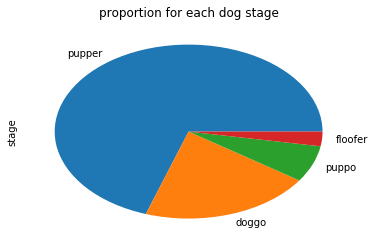

In [14]:
df['rating']=df['rating_numerator']/df['rating_denominator']
df.stage.value_counts().plot(kind='pie',title='proportion for each dog stage');
df.stage.value_counts()


### As seen above in the pie shart  we can see that most most of our dogs are in pupper stage :D

###  2-what is proporpotion for each dog breed in the data set?


golden_retriever      139
Labrador_retriever     92
Pembroke               85
Chihuahua              78
pug                    55
Name: p1, dtype: int64

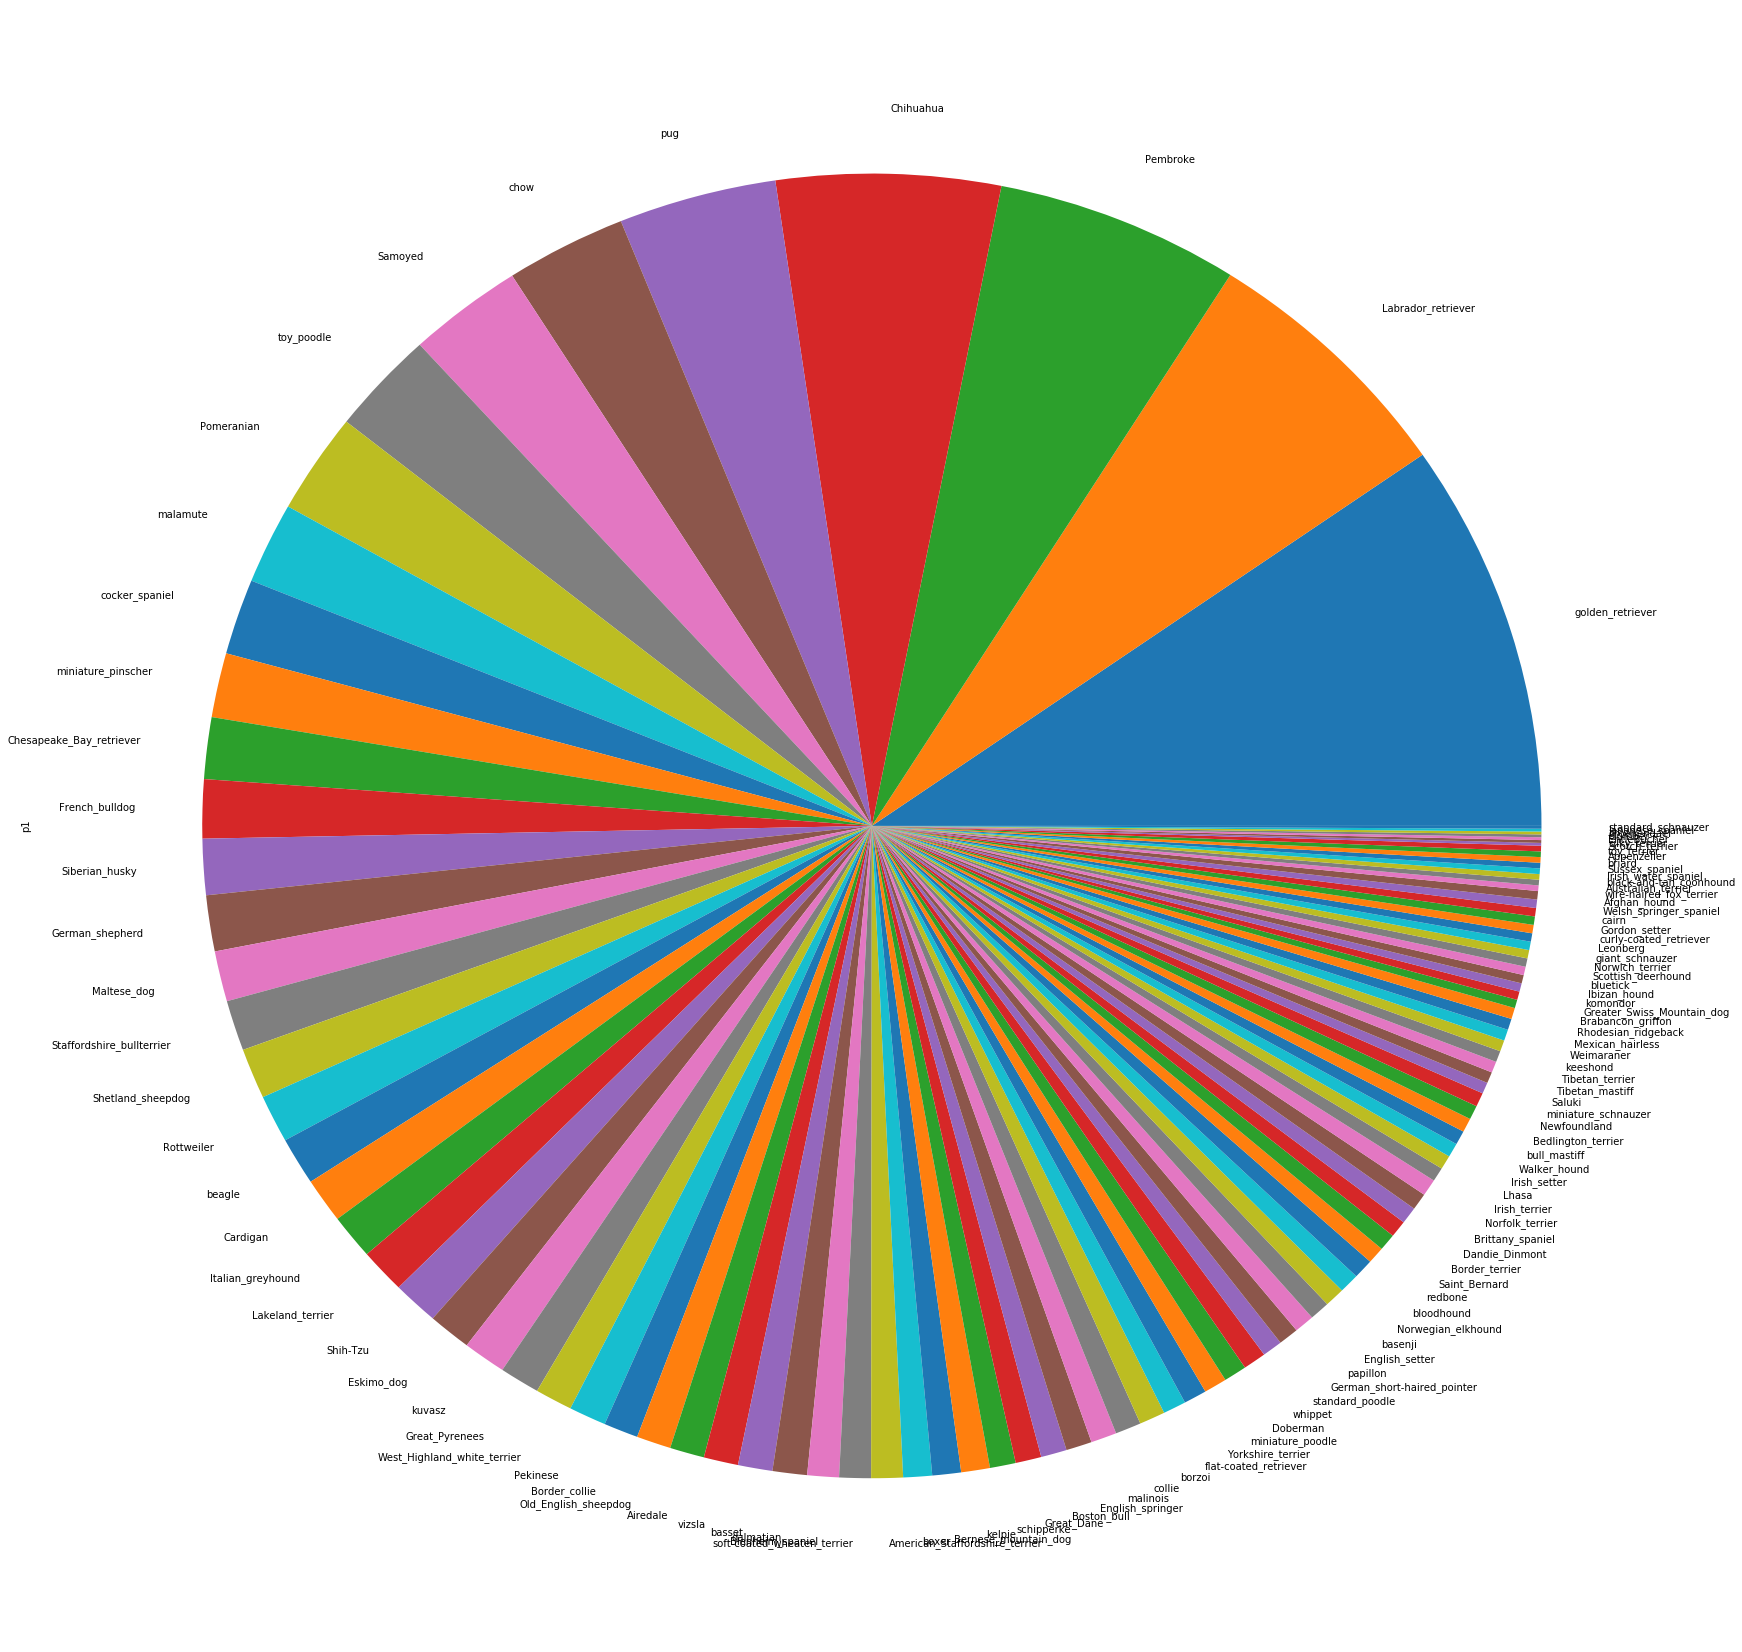

In [15]:
df[df['p1_dog']==True].p1.value_counts().plot(kind='pie',figsize=(30, 30));

df[df['p1_dog']==True].p1.value_counts().head()


### The golden_retriever breed  is the most frequent breed  in our tweets.

###  3-what is the average rating overall and for every stage and dog breed?


In [16]:
#over all average rating
print('overall average rating: ',df['rating'].mean())

overall average rating:  1.16747479167


average rating per stage:  stage
doggo      1.198361
floofer    1.187500
pupper     1.075728
puppo      1.195000
Name: rating, dtype: float64


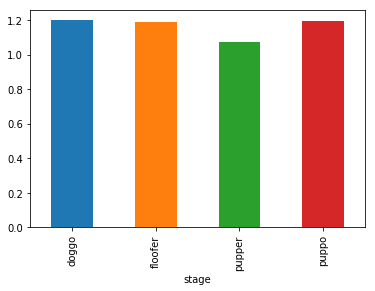

In [17]:
#average rating per stage
print('average rating per stage: ',df.groupby('stage')['rating'].mean())
df.groupby('stage')['rating'].mean().plot(kind='bar');

In [18]:
#average rating per dog pred
df[df['p1_dog']==True].groupby('p1')['rating'].mean().sort_values(ascending=False).head()

p1
clumber            2.700
Saluki             1.250
briard             1.250
Tibetan_mastiff    1.225
Irish_setter       1.220
Name: rating, dtype: float64

### As per our data we have an overall rating of 1.167 and for dog satges we can see that doggo gets a sligthly better rating and for the dog breed, the clumber breed is the top rated then comes the Saluki.

###  4-Is the dog stage related to the number of retweets and favorite count?


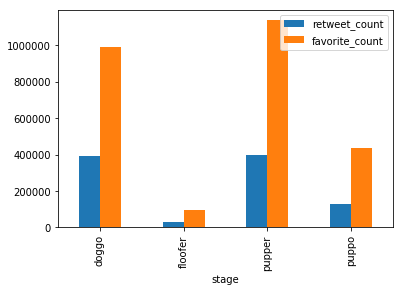

In [19]:
df.groupby('stage')['retweet_count','favorite_count'].sum().plot(kind='bar');

### As we can see from the bar chart here  doggo and pupper are the most retweeted about and pupper tweets are the most favoured which indicates that yes dog stage has an impact on  retweets and favorite count.


###  5-Is the dog breed related to the number of retweets ?

In [20]:
df[df['p1_dog']==True].groupby('p1')['retweet_count'].mean().sort_values(ascending=False).head()


p1
standard_poodle     5561.142857
English_springer    5002.777778
Afghan_hound        4911.333333
Eskimo_dog          4895.000000
Saluki              4251.750000
Name: retweet_count, dtype: float64

### standard_poodle tweets comes first when it comes to number of retweets then following breeds tweets has the most retweets English_springer, Afghan_hound, Eskimo_dog, and Saluki


###  6-Is the dog breed related to the number of likes ?

In [21]:
df[df['p1_dog']==True].groupby('p1')['favorite_count'].mean().sort_values(ascending=False).head()


p1
Saluki                     21284.750000
French_bulldog             15168.619048
black-and-tan_coonhound    14989.000000
flat-coated_retriever      14858.625000
Eskimo_dog                 13249.000000
Name: favorite_count, dtype: float64

#### As we can see Saluki dogs tweets are the most favoured on average then come French_bulldog, tan_coonhound, flat-coated_retriever, and Eskimo_dog   
#### so we can say that Saluki and Eskimo_dog tweets are the most interacted with as they appear in both top retweeted and top favoured

In [22]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'act_report.ipynb'])

0